In [23]:
import subprocess
import numpy as np
import datetime
import random
from tqdm import tqdm
subprocess.check_output(['./bin/tc_mul', 'f47', '2']).decode('utf-8')[:-1]

'1e8e'

In [29]:
TRIALS_PER_SIZE = 50
BIT_LENGTHS = np.arange(4, 4100, 16)

tc = []
gs = []

def trial(path, a, b):
    start = datetime.datetime.now()
    result = subprocess.check_output([result, '{:x}'.format(a), '{:x}'.format(b)]).decode('utf-8')[:-1] 
    end = datetime.datetime.now()
    return (end - start).total_seconds()



for i in tqdm(BIT_LENGTHS):
    tc_trials = []
    gs_trials = []
    for _ in range(TRIALS_PER_SIZE):
        a = random.getrandbits(i) * random.choice([-1, 1])
        b = random.getrandbits(i) * random.choice([-1, 1])
        tc_start = datetime.datetime.now()
        tc_end = datetime.datetime.now()
        if tc_result != "{:x}".format(a * b):
            print(tc_result)
            print("{:x},{:x},{:x}".format(a, b, a * b))
            assert False

        tc_trials.append((tc_end - tc_start).total_seconds())
        
        gs_start = datetime.datetime.now()
        gs_result = subprocess.check_output(['./bin/gs_mul', '{:x}'.format(a), '{:x}'.format(b)]).decode('utf-8')[:-1] 
        gs_end = datetime.datetime.now()
        assert gs_result == "{:x}".format(a * b)
        if gs_result != "{:x}".format(a * b):
            print(gs_result)
            print("{:x},{:x},{:x}".format(a, b, a * b))
            assert False

        gs_trials.append((gs_end - gs_start).total_seconds())

    tc.append(np.mean(tc_trials))
    gs.append(np.mean(gs_trials))




    





100%|██████████| 256/256 [10:44<00:00,  2.52s/it]


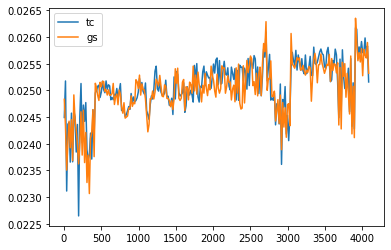

In [31]:

# plot the results 
import matplotlib.pyplot as plt
plt.figure()
plt.plot(BIT_LENGTHS, tc, label='tc')
plt.plot(BIT_LENGTHS, gs, label='gs')
plt.legend()
plt.show()